## Machine Learning Develop

#### We create a dataset to save the accuracies

In [3]:
import pandas as pd

accuracy_saves = pd.DataFrame(columns=['Modelo', 'Accuracy'])

def guardar_accuracy(modelo,accuracy):

    # Accedo a la variable accuracy saves donde guardaremos los resultados
    global accuracy_saves
    
    accuracy_saves.loc[len(accuracy_saves.index)] = [modelo, accuracy]


def actualizar_accuracy(modelo,accuracy):
    
    # Accedo a la variable accuracy saves donde actualizaremos los resultados
    global accuracy_saves
    accuracy_saves.loc[accuracy_saves['Modelo'] == modelo, 'Accuracy'] = accuracy

### Import the datasets


In [4]:
import pandas as pd

# load the csv data sets

# Con Index = False, no guardamos el indice en el archivo resultante
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
X_train_scaled = pd.read_csv("../data/processed/X_train_scaled.csv")
X_test_scaled = pd.read_csv("../data/processed/X_test_scaled.csv")

y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")


### We see the data again and the values

In [5]:
X_train

,age,bmi,children,sex_n,smoker_n,region_n
0,19,17.480,0,1,0,2
1,19,36.955,0,1,1,2
2,52,18.335,0,0,0,2
3,54,31.240,0,0,0,1
4,34,30.800,0,1,1,0
...,...,...,...,...,...,...
991,23,31.400,0,0,1,0
992,31,29.810,0,1,1,1
993,40,25.080,0,1,0,1
994,50,32.110,2,1,0,3


In [1]:
sex_parse_dict = {'Male': 1, 'Female': 0}
smoker_parse_dict = {'No': 0, 'Yes': 1}
region_parse_dict = {'Southwest': 0, 'Southeast': 1, 'Northwest': 2, 'Northeast': 3}


### Load the model

#### Normalized prediction

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Saves the model

In [5]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = model

ruta_guardado = '../models/lineal_regresion_model.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)

Normalized Train

In [6]:
y_pred_train = model.predict(X_train_scaled)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

target = y_train
predict = y_pred_train

texto_a_guardar = 'Train normalizada'

# Calcula el Mean Absolute Error (MAE)
mae = mean_absolute_error(target, predict)
print(f'MAE: {mae}')

# Calcula el Mean Squared Error (MSE)
mse = mean_squared_error(target, predict)
print(f'MSE: {mse}')

# Calcula el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calcula el Coeficiente de Determinación (R²)
r2 = r2_score(target, predict)
print(f'R²: {r2}')


guardar_accuracy(texto_a_guardar ,r2 )

MAE: 4347.249052080343
MSE: 36956537.450290285
RMSE: 6079.188880951988
R²: 0.7384093827798476


Normalized Test

In [8]:
y_pred_test = model.predict(X_test_scaled)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

target = y_test
predict = y_pred_test

texto_a_guardar = 'Test normalizada'

# Calcula el Mean Absolute Error (MAE)
mae = mean_absolute_error(target, predict)
print(f'MAE: {mae}')

# Calcula el Mean Squared Error (MSE)
mse = mean_squared_error(target, predict)
print(f'MSE: {mse}')

# Calcula el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calcula el Coeficiente de Determinación (R²)
r2 = r2_score(target, predict)
print(f'R²: {r2}')


guardar_accuracy(texto_a_guardar ,r2 )

MAE: 3938.6382803324423
MSE: 31465091.638340592
RMSE: 5609.375334058204
R²: 0.7269938684607764


#### Normalized prediction with SelectKBests

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression
from sklearn.metrics import accuracy_score, r2_score
import warnings

predictora = X_train_scaled
target = y_train

clasificador_escogido = f_regression
modelo_escogido = LinearRegression()

clasificacion = False

# Tras este codigo tendremos una predictora 'X_selected' con las mejores
#   columnas seleccionadas
#-----------------

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    accs = []
    percents = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
    for p in percents:

        k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * p))
        k_best.fit(predictora, target)

        # Guardamos las columnas con su nombre y su dataframe
        ix = k_best.get_support()
        train_sel = pd.DataFrame(k_best.transform(predictora), columns = X_train_scaled.columns.values[ix])
        
        if clasificacion:

            # Definir el clasificador
            model = modelo_escogido
            model.fit(train_sel, target)
            y_pred = model.predict(train_sel)
            acc = accuracy_score(target, y_pred)
            accs.append(acc)

        else:

            # Definir el regresor
            model = modelo_escogido
            model.fit(train_sel, target)
            y_pred = model.predict(train_sel)
            acc = r2_score(target.values, y_pred)
            accs.append(acc)
        

    best_acc = accs.index(max(accs)) 
    print(f'The best k for selection is {percents[best_acc]}.')
    print(f'The best accuracy we get is {round(accs[best_acc],8)}.')

    print(accs)

    # Guardamos el dataframe con las columnas escogidas
    k_best = SelectKBest(clasificador_escogido, k = int(len(predictora.columns) * percents[best_acc]))
    k_best.fit(predictora.values, target.values)

    # Guardamos las columnas con su nombre y su dataframe
    ix = k_best.get_support()
    X_selected = pd.DataFrame(k_best.transform(predictora), columns = predictora.columns.values[ix])


The best k for selection is 1.
The best accuracy we get is 0.73840938.
[0.7384093827798476, 0.7376194723731121, 0.736242704838546, 0.736242704838546, 0.7362425185537771, 0.7362425185537771]


### We plot to check the model

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
# podemos conocer y guardar los parametros a, b de
#    la formula de regresion lineal

dataset = X_train_scaled

columnas = dataset.columns
coeficientes = model.coef_[0]

intercepto_a = model.intercept_[0]
coeficientes_b = {}

print(f"Intercepto (a): {model.intercept_[0]}")

for col, coef in zip(columnas, coeficientes):
    print(f"Coeficiente (b) para {col}: {coef}")
    coeficientes_b[col] = coef

Intercepto (a): 13242.833551996988
Coeficiente (b) para age: 3561.8363268294675
Coeficiente (b) para bmi: 2174.543120642818
Coeficiente (b) para children: 447.2850040287882
Coeficiente (b) para sex_n: -16.746153842078684
Coeficiente (b) para smoker_n: -9331.966018567995
Coeficiente (b) para region_n: 338.94057253854


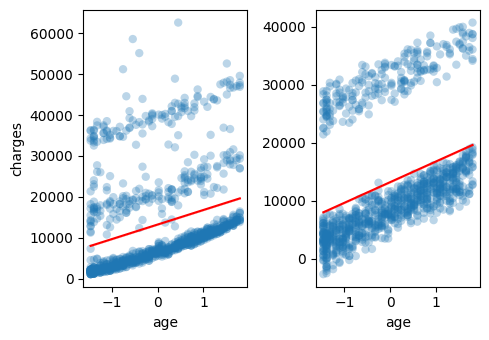

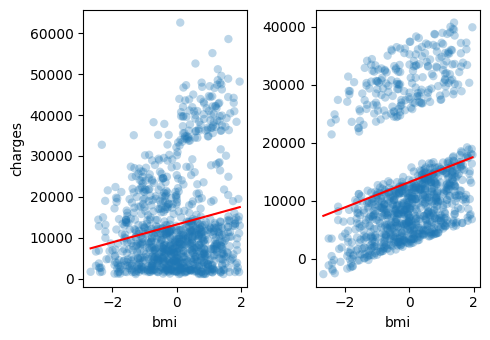

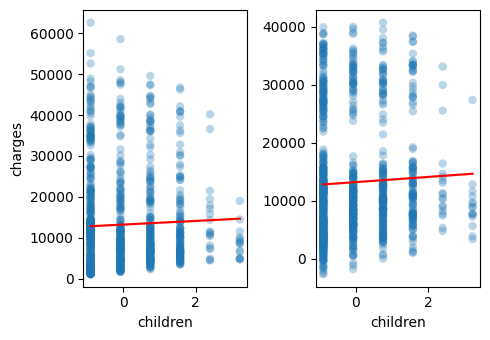

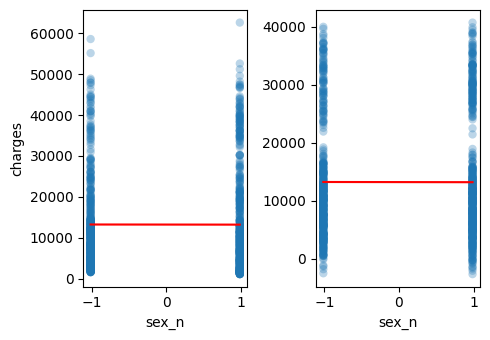

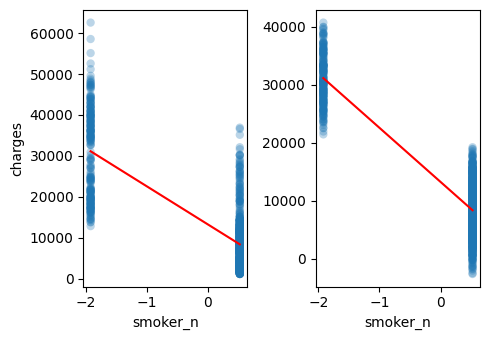

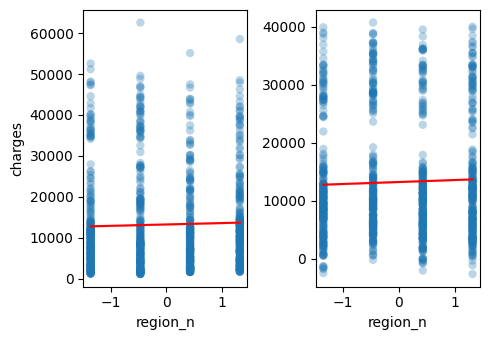

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Introducimos los dataset a graficar
predictora = X_train_scaled
target = y_train
prediccion = y_pred_train

for column in predictora.columns:

    # Colocamos los ejes para el grafico
    eje_x = column
    eje_y = y_train.columns[0]

    #conseguimos los valores a y b para graficar las lineas
    intercepto_a = intercepto_a
    coeficiente_b = coeficientes_b[eje_x]

    # Creamos la figura
    fig, axis = plt.subplot_mosaic([['g1' ,'g2']], figsize = (5, 3.5))

    # Creamos una variable con todas las columnas de train y test
    total_data = pd.concat([predictora, target], axis=1)

    # Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
    regression_equation = lambda x: intercepto_a + coeficiente_b * x

    sns.scatterplot(ax = axis['g1'], data = total_data, x = total_data[eje_x], y = total_data[eje_y], alpha = 0.3, edgecolor='none')
    sns.lineplot(ax = axis['g1'], x = total_data[eje_x], y = regression_equation(total_data[eje_x]), color= 'red')
    sns.scatterplot(ax = axis['g2'], x = total_data[eje_x], y = prediccion.ravel(), alpha = 0.3,  edgecolor='none')
    sns.lineplot(ax = axis['g2'], x = total_data[eje_x], y = regression_equation(total_data[eje_x]),color= 'red').set(ylabel = None)

    plt.tight_layout()

    plt.show()

#### We review the accuracy

In [24]:
accuracy_saves

,Modelo,Accuracy
0,Train normalizada,0.729718
1,Test normalizada,0.791773


I do not save the model data with selectKbests because the best result is obtained with all columns.

Today we have learned:
- How to create a linear regression model
- To see the metrics used for regression. 
- To plot the linear regression line of our model with the intercept and coefficient values. 

